In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [2]:
# setting the path for joining multiple files
files = os.path.join("Resources/City Temp data","CityTs_*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
dfTemp = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(dfTemp)

Resultant CSV after joining all CSV files at a particular location...
         Region   Country State        City  Month  Day  Year  AvgTemperature
0        Africa   Algeria   NaN     Algiers      1    1  1995            64.2
1        Africa   Algeria   NaN     Algiers      1    2  1995            49.4
2        Africa   Algeria   NaN     Algiers      1    3  1995            48.8
3        Africa   Algeria   NaN     Algiers      1    4  1995            46.4
4        Africa   Algeria   NaN     Algiers      1    5  1995            47.9
...         ...       ...   ...         ...    ...  ...   ...             ...
2906322  Europe  Slovakia   NaN  Bratislava     12    8  2010            39.2
2906323  Europe  Slovakia   NaN  Bratislava     12    9  2010            36.4
2906324  Europe  Slovakia   NaN  Bratislava     12   10  2010            30.7
2906325  Europe  Slovakia   NaN  Bratislava     12   11  2010            32.8
2906326  Europe  Slovakia   NaN  Bratislava     12   12  2010           

In [3]:
dfTemp=dfTemp[['Country','City','Month','Day','Year','AvgTemperature']].copy()
dfTemp

,Country,City,Month,Day,Year,AvgTemperature
0,Algeria,Algiers,1,1,1995,64.2
1,Algeria,Algiers,1,2,1995,49.4
2,Algeria,Algiers,1,3,1995,48.8
3,Algeria,Algiers,1,4,1995,46.4
4,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...
2906322,Slovakia,Bratislava,12,8,2010,39.2
2906323,Slovakia,Bratislava,12,9,2010,36.4
2906324,Slovakia,Bratislava,12,10,2010,30.7
2906325,Slovakia,Bratislava,12,11,2010,32.8


In [4]:
dfTemp=dfTemp[dfTemp.AvgTemperature!=-99]
dfTemp['Year'].value_counts()

2001    115277
2005    114775
2004    114597
2003    114283
2006    114201
2000    114169
2010    113642
2002    113616
1999    113406
2007    113180
2009    112977
1997    112952
1996    112734
2008    112724
2011    112407
1995    112152
2012    111165
1998    111102
2013    110228
2014    107860
2015    106809
2017    106421
2016    106403
2018    105748
2019    105085
2020     38742
Name: Year, dtype: int64

In [5]:
dfTemp.dtypes

Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [6]:
dfTemp=dfTemp.drop(columns=['Day'])
dfTemp2=dfTemp.groupby(['Country','City','Year','Month'],sort=False).mean()
dfTemp2=dfTemp2.reset_index()
dfTemp2



,Country,City,Year,Month,AvgTemperature
0,Algeria,Algiers,1995,1,51.419355
1,Algeria,Algiers,1995,2,54.800000
2,Algeria,Algiers,1995,3,55.000000
3,Algeria,Algiers,1995,4,57.193333
4,Algeria,Algiers,1995,5,67.409677
...,...,...,...,...,...
92908,Slovakia,Bratislava,2010,7,73.193548
92909,Slovakia,Bratislava,2010,8,67.645161
92910,Slovakia,Bratislava,2010,9,58.090000
92911,Slovakia,Bratislava,2010,10,46.493548


In [7]:
dfTemp2['Country'].value_counts()

US                   46072
Canada                2446
China                 1525
Australia             1521
India                 1220
                     ...  
Sierra Leone           133
Malawi                 131
Guyana                 121
Serbia-Montenegro      111
Burundi                 71
Name: Country, Length: 125, dtype: int64

In [8]:
dffossil = pd.read_csv("Resources/owid-co2-data.csv")
dffossil

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.70,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,ZWE,14030338.0,2.096179e+10,0.639,0.046,10.738,-1.488,-12.17,...,0.02,NaN,NaN,NaN,0.03,NaN,115.92,28.53,1.415,13.18
26004,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,0.678,0.048,9.582,-1.156,-10.77,...,0.02,NaN,NaN,NaN,0.03,NaN,115.59,28.30,1.666,17.39
26005,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,0.697,0.048,11.854,2.273,23.72,...,0.02,NaN,NaN,NaN,0.03,NaN,118.22,30.83,1.308,11.04
26006,Zimbabwe,2019,ZWE,14645473.0,NaN,0.697,0.048,10.949,-0.905,-7.64,...,0.02,NaN,NaN,NaN,0.03,NaN,117.96,30.53,1.473,13.45


In [9]:
dffossil['country'].value_counts()

Europe (excl. EU-27)     271
High-income countries    271
World                    271
European Union (28)      271
United Kingdom           271
                        ... 
Namibia                   31
Palestine                 31
Kuwaiti Oil Fires         30
Wallis and Futuna         20
Kosovo                    13
Name: country, Length: 247, dtype: int64

In [10]:
dffossil['country'] = dffossil['country'].replace(['United States'], 'US')

In [11]:
dffossil=dffossil[['country','year','population','co2']].copy()

In [12]:
dffossil.rename(columns={'country':'Country','year':'Year'},inplace=True)
dffossil

,Country,Year,population,co2
0,Afghanistan,1949,7624058.0,0.015
1,Afghanistan,1950,7752117.0,0.084
2,Afghanistan,1951,7840151.0,0.092
3,Afghanistan,1952,7935996.0,0.092
4,Afghanistan,1953,8039684.0,0.106
...,...,...,...,...
26003,Zimbabwe,2016,14030338.0,10.738
26004,Zimbabwe,2017,14236599.0,9.582
26005,Zimbabwe,2018,14438812.0,11.854
26006,Zimbabwe,2019,14645473.0,10.949


In [13]:
Masterdf = pd.merge(dffossil,dfTemp2, on=['Country','Year'])
Masterdf['co2']=Masterdf['co2'].apply(lambda x: x*.0833)
Masterdf

,Country,Year,population,co2,City,Month,AvgTemperature
0,Albania,1997,3099747.0,0.127616,Tirana,4,58.340000
1,Albania,1997,3099747.0,0.127616,Tirana,5,67.233333
2,Albania,1997,3099747.0,0.127616,Tirana,6,77.366667
3,Albania,1997,3099747.0,0.127616,Tirana,7,80.811111
4,Albania,1998,3110699.0,0.145275,Tirana,2,47.800000
...,...,...,...,...,...,...,...
90436,Zambia,2013,14926551.0,0.367853,Lusaka,9,71.777778
90437,Zambia,2013,14926551.0,0.367853,Lusaka,10,78.150000
90438,Zambia,2013,14926551.0,0.367853,Lusaka,11,77.838095
90439,Zambia,2013,14926551.0,0.367853,Lusaka,12,74.086364


In [14]:
Masterdf['City'].value_counts()

Montgomery              305
Macon                   305
Bridgeport              305
Hartford Springfield    305
Abilene                 305
                       ... 
Georgetown              121
Flagstaff               118
Yerevan                 106
Bonn                     96
Bujumbura                71
Name: City, Length: 312, dtype: int64

In [15]:
Masterdf['DATE'] = pd.to_datetime(Masterdf[['Year', 'Month']].assign(DAY=1))
Masterdf = Masterdf[Masterdf.Year!=2020]
Masterdf

,Country,Year,population,co2,City,Month,AvgTemperature,DATE
0,Albania,1997,3099747.0,0.127616,Tirana,4,58.340000,1997-04-01
1,Albania,1997,3099747.0,0.127616,Tirana,5,67.233333,1997-05-01
2,Albania,1997,3099747.0,0.127616,Tirana,6,77.366667,1997-06-01
3,Albania,1997,3099747.0,0.127616,Tirana,7,80.811111,1997-07-01
4,Albania,1998,3110699.0,0.145275,Tirana,2,47.800000,1998-02-01
...,...,...,...,...,...,...,...,...
90436,Zambia,2013,14926551.0,0.367853,Lusaka,9,71.777778,2013-09-01
90437,Zambia,2013,14926551.0,0.367853,Lusaka,10,78.150000,2013-10-01
90438,Zambia,2013,14926551.0,0.367853,Lusaka,11,77.838095,2013-11-01
90439,Zambia,2013,14926551.0,0.367853,Lusaka,12,74.086364,2013-12-01


In [16]:
Masterdf['DATE']=Masterdf['DATE'].dt.date 

C:\Users\micha\AppData\Local\Temp\ipykernel_18424\1079734254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Masterdf['DATE']=Masterdf['DATE'].dt.date


In [17]:
df_list = [d for _, d in Masterdf.groupby(['City'])]
df_list[0]

,Country,Year,population,co2,City,Month,AvgTemperature,DATE
44419,US,1995,265163744.0,451.611117,Abilene,1,45.503226,1995-01-01
44420,US,1995,265163744.0,451.611117,Abilene,2,50.042857,1995-02-01
44421,US,1995,265163744.0,451.611117,Abilene,3,53.096774,1995-03-01
44422,US,1995,265163744.0,451.611117,Abilene,4,62.623333,1995-04-01
44423,US,1995,265163744.0,451.611117,Abilene,5,69.761290,1995-05-01
...,...,...,...,...,...,...,...,...
87928,US,2019,329064896.0,437.809473,Abilene,8,87.403226,2019-08-01
87929,US,2019,329064896.0,437.809473,Abilene,9,82.953333,2019-09-01
87930,US,2019,329064896.0,437.809473,Abilene,10,64.064516,2019-10-01
87931,US,2019,329064896.0,437.809473,Abilene,11,51.883333,2019-11-01


In [18]:
#for df in df_list:
#    fig,ax=plt.subplots()
#    ax.plot(df.DATE,df.co2,color='red')
#    Title=df.iloc[1,4]
#    plt.title(Title)
#    ax.set_xlabel('Date',fontsize=14)
#    ax.set_ylabel('CO2 Emission',color='red',fontsize=14)
#    ax2=ax.twinx()
#    ax2.plot(df.DATE,df.AvgTemperature,color='steelblue')
#    ax2.set_ylabel('Average Temp',color='steelblue',fontsize=14)

In [19]:
#yearly averages
dfTemp3=dfTemp.groupby(['Country','City','Year'],sort=False).mean()
dfTemp3=dfTemp3.reset_index()

Masteryear = pd.merge(dffossil,dfTemp3, on=['Country','Year'])
Masteryear=Masteryear.drop(columns=['Month'])
Masteryear = Masteryear[Masteryear.Year!=2020]

Masteryear

,Country,Year,population,co2,City,AvgTemperature
0,Albania,1997,3099747.0,1.532,Tirana,71.934783
1,Albania,1998,3110699.0,1.744,Tirana,61.612500
2,Albania,1999,3122700.0,2.975,Tirana,63.116961
3,Albania,2000,3129246.0,3.004,Tirana,63.176945
4,Albania,2001,3129701.0,3.221,Tirana,61.235600
...,...,...,...,...,...,...
7748,Zambia,2010,13605986.0,3.120,Lusaka,66.271781
7749,Zambia,2011,14023199.0,3.372,Lusaka,69.388857
7750,Zambia,2012,14465148.0,4.166,Lusaka,69.747658
7751,Zambia,2013,14926551.0,4.416,Lusaka,69.934164


In [20]:
df_list2 = [d for _, d in Masteryear.groupby(['City'])]
df_list2[0]

,Country,Year,population,co2,City,AvgTemperature
3827,US,1995,265163744.0,5421.502,Abilene,63.397808
3981,US,1996,268335008.0,5610.582,Abilene,63.397479
4135,US,1997,271713632.0,5686.465,Abilene,62.568493
4289,US,1998,275175328.0,5731.050,Abilene,66.611911
4443,US,1999,278548160.0,5804.669,Abilene,66.054121
4597,US,2000,281710912.0,6010.508,Abilene,66.099727
4751,US,2001,284608000.0,5904.882,Abilene,64.487671
4905,US,2002,287279328.0,5946.771,Abilene,63.122715
5059,US,2003,289815552.0,6011.837,Abilene,64.418457
5213,US,2004,292354656.0,6114.007,Abilene,63.231421


In [21]:
#yearly visualization
#for df in df_list2:
#    fig,ax=plt.subplots()
#    ax.plot(df.Year,df.co2,color='red')
#    Title=df.iloc[1,4]
#    plt.title(Title)
#    ax.set_xlabel('Date',fontsize=14)
#    ax.set_ylabel('CO2 Emission',color='red',fontsize=14)
#    ax2=ax.twinx()
#    ax2.plot(df.Year,df.AvgTemperature,color='steelblue')
#    ax2.set_ylabel('Average Temp',color='steelblue',fontsize=14)

In [22]:
#predict Co2
from sklearn.model_selection import train_test_split
import datetime as dt
Citylist=[]
Coeflist=[]
Interceptlist=[]
Scorelist=[]
for df in df_list2:
    y=df['co2'].values
    X=df['Year'].values.reshape(-1,1)
    X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = .7,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    Scorelist.append(model.score(X_train,y_train))
    
    Citylist.append(df.iloc[1,4])
    Coeflist.append(model.coef_)
    Interceptlist.append(model.intercept_)
Eqdf=pd.DataFrame({'City':Citylist,'Coef':Coeflist,"Intercept":Interceptlist,"Model Score":Scorelist})
Eqdf

    

,City,Coef,Intercept,Model Score
0,Abilene,[-32.047230626800165],69989.597660,0.570519
1,Abu Dhabi,[6.326346043066796],-12556.417402,0.777731
2,Addis Ababa,[0.5971109587162255],-1191.074204,0.891847
3,Akron Canton,[-32.047230626800165],69989.597660,0.570519
4,Albany,[-32.047230626800165],69989.597660,0.570519
...,...,...,...,...
307,Yerevan,[-5.699493877551019],12903.419012,0.086654
308,Youngstown,[-32.047230626800165],69989.597660,0.570519
309,Yuma,[44.91378306878298],-83978.627540,0.799973
310,Zagreb,[-0.1509925742574258],323.389585,0.282649


In [23]:
#graph CO2


In [24]:
#predict Temp
Citylist2=[]
Coeflist2=[]
Interceptlist2=[]
Scorelist2=[]
for df in df_list2:
    y=df['AvgTemperature'].values
    X=df['Year'].values.reshape(-1,1)
    X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = .7,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    Scorelist2.append(model.score(X_train,y_train))
    
    Citylist2.append(df.iloc[1,4])
    Coeflist2.append(model.coef_)
    Interceptlist2.append(model.intercept_)
Eqdf2=pd.DataFrame({'City':Citylist2,'Coef':Coeflist2,"Intercept":Interceptlist2,"Model Score":Scorelist2})
Eqdf2

,City,Coef,Intercept,Model Score
0,Abilene,[0.030375962197581624],3.937262,0.032821
1,Abu Dhabi,[0.0844176070261095],-86.353298,0.376811
2,Addis Ababa,[-0.012473863808340055],88.182569,0.007648
3,Akron Canton,[0.09625285162180261],-142.110942,0.216395
4,Albany,[0.05142123928600875],-53.665480,0.086262
...,...,...,...,...
307,Yerevan,[0.1605499893436149],-265.025642,0.268587
308,Youngstown,[0.028843712479183794],-7.629465,0.024072
309,Yuma,[0.026821607941575697],22.129661,0.012628
310,Zagreb,[0.09719870391757765],-140.464102,0.391555


In [25]:
#graph Temp

In [26]:
#predict Temp off Co2
Citylist3=[]
Coeflist3=[]
Interceptlist3=[]
Scorelist3=[]
for df in df_list2:
    y=df['AvgTemperature'].values
    X=df['co2'].values.reshape(-1,1)
    X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = .7,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    Scorelist3.append(model.score(X_train,y_train))
    
    Citylist3.append(df.iloc[1,4])
    Coeflist3.append(model.coef_)
    Interceptlist3.append(model.intercept_)
Eqdf3=pd.DataFrame({'City':Citylist3,'Coef':Coeflist3,"Intercept":Interceptlist3,"Model Score":Scorelist3})
Eqdf3


,City,Coef,Intercept,Model Score
0,Abilene,[-0.0013522791597710777],72.558894,0.117095
1,Abu Dhabi,[0.009176398524532567],81.806276,0.229128
2,Addis Ababa,[-0.003785180540718625],63.166248,0.000282
3,Akron Canton,[-0.002595801007311349],65.800343,0.283318
4,Albany,[-0.00153699616334461],58.254865,0.138736
...,...,...,...,...
307,Yerevan,[-0.0016096381119144122],58.319322,0.010121
308,Youngstown,[-0.0011898443527514836],56.999047,0.073741
309,Yuma,[0.00033165064143604253],73.831582,0.004869
310,Zagreb,[-0.18296972554856222],58.441028,0.111916


Choose City: Zurich
Year: 2080


Predicted average temperature in 2080 is 
[52.80537226]


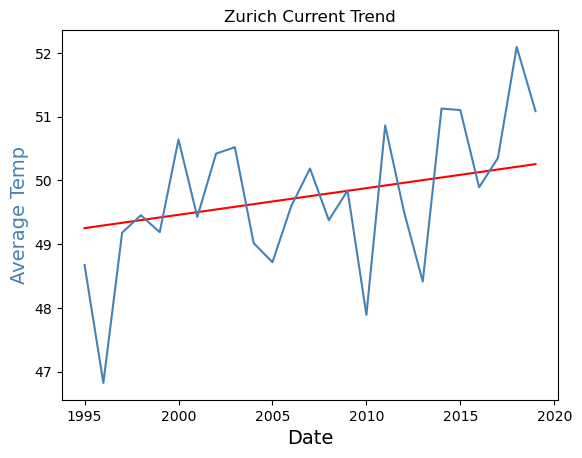

In [27]:
#Temperature Estimator
while True:             # Loop continuously
    TargetCity = input('Choose City:')
    TargetYear= input('Year:')
    if (Eqdf2['City'] == TargetCity).any():
        Tempdf=Eqdf2.loc[Eqdf2['City'] == TargetCity]
        Temperature=Tempdf.iloc[0]['Coef']*int(TargetYear)+Tempdf.iloc[0]['Intercept']
        B= Eqdf2.index[Eqdf2['City']==TargetCity].tolist()
        A=B[0]
        formula=Tempdf.iloc[0]['Coef']*df_list2[A].Year+Tempdf.iloc[0]['Intercept']
        #Z=A[0]
        print("Predicted average temperature in " + TargetYear + " is ")
        print(Temperature)
        fig,ax=plt.subplots()
        ax.plot(df_list2[A].Year,formula,color='red')
        Title=df_list2[A].iloc[1,4]
        plt.title(Title + " " + "Current Trend")
        ax.set_xlabel('Date',fontsize=14)
        ax.set_ylabel('Temperature Trend',color='red',fontsize=14)
        #ax2=ax.twinx()
        ax.plot(df_list2[A].Year,df_list2[A].AvgTemperature,color='steelblue')
        ax.set_ylabel('Average Temp',color='steelblue',fontsize=14)
        break


In [28]:
print(A)

311


In [34]:
filter1df = Eqdf2[Eqdf2['Coef']<1]
filter2df = filter1df[filter1df['Coef']>-1]
Sorteddf = filter2df.sort_values(by=['Coef'],ascending=False)
Sorteddf

,City,Coef,Intercept,Model Score
128,Hamburg,[0.3805959408421501],-711.900245,0.251066
109,Flagstaff,[0.370142382497511],-693.070355,0.608565
303,Wilmington,[0.19411788700647106],-333.056198,0.194475
307,Yerevan,[0.1605499893436149],-265.025642,0.268587
97,Dubai,[0.16023422703529278],-237.789330,0.741744
...,...,...,...,...
127,Halifax,[-0.3086492880255677],662.351558,0.285513
214,Ottawa,[-0.3526983036402557],750.984638,0.259558
286,Toronto,[-0.3746855669137515],798.786733,0.262302
101,Edmonton,[-0.3763071393566553],793.561998,0.247385


In [35]:
Sorteddf.head()

,City,Coef,Intercept,Model Score
128,Hamburg,[0.3805959408421501],-711.900245,0.251066
109,Flagstaff,[0.370142382497511],-693.070355,0.608565
303,Wilmington,[0.19411788700647106],-333.056198,0.194475
307,Yerevan,[0.1605499893436149],-265.025642,0.268587
97,Dubai,[0.16023422703529278],-237.789330,0.741744


In [31]:
Sorteddf.tail()

,City,Coef,Intercept,Model Score
127,Halifax,[-0.3086492880255677],662.351558,0.285513
214,Ottawa,[-0.3526983036402557],750.984638,0.259558
286,Toronto,[-0.3746855669137515],798.786733,0.262302
101,Edmonton,[-0.3763071393566553],793.561998,0.247385
305,Winnipeg,[-0.5177652197397916],1075.394776,0.315503
